# Bewerber Aufgabe
### Kateryna Kolesova

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data
data = pd.read_csv("Inputdaten.csv", delimiter=';')
data

,Cycle,active_ego,width_ego,length_ego,x_ego,y_ego,vx_ego,vy_ego,ax_ego,ay_ego,...,active_2,width_2,length_2,x_2,y_2,vx_2,vy_2,ax_2,ay_2,w_2
0,0,1,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-2.000000e-09,0.000000,...,1,2.065268,7,10040.56184,-9.700850,0.000000,0.000000,0.000000,0.000000,0.023485
1,1,1,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,...,1,2.065268,7,10040.56184,-9.700850,0.000000,0.000000,0.000000,0.000000,0.023485
2,2,1,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,...,1,2.065268,7,10040.56194,-9.700848,0.009996,0.000235,0.999644,0.023481,0.023485
3,3,1,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,...,1,2.065268,7,10040.56214,-9.700843,0.019993,0.000470,0.999644,0.023481,0.023485
4,4,1,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,...,1,2.065268,7,10040.56244,-9.700836,0.029989,0.000704,0.999644,0.023481,0.023485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8980,8980,1,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,...,1,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464
8981,8981,1,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,...,1,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464
8982,8982,1,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,...,1,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464
8983,8983,1,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,...,1,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464


In [3]:
#removing data that is not significant
data = data.drop([
    "active_ego", "active_1", "active_2",], axis=1)
data

,Cycle,width_ego,length_ego,x_ego,y_ego,vx_ego,vy_ego,ax_ego,ay_ego,w_ego,...,w_1,width_2,length_2,x_2,y_2,vx_2,vy_2,ax_2,ay_2,w_2
0,0,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-2.000000e-09,0.000000,0.020000,...,0.000420,2.065268,7,10040.56184,-9.700850,0.000000,0.000000,0.000000,0.000000,0.023485
1,1,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,0.020000,...,0.000420,2.065268,7,10040.56184,-9.700850,0.000000,0.000000,0.000000,0.000000,0.023485
2,2,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,0.020000,...,0.000420,2.065268,7,10040.56194,-9.700848,0.009996,0.000235,0.999644,0.023481,0.023485
3,3,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,0.020000,...,0.000420,2.065268,7,10040.56214,-9.700843,0.019993,0.000470,0.999644,0.023481,0.023485
4,4,1.899,5.289,10000.24118,-10.580853,3.000000e-10,0.000000,-1.900000e-09,0.000000,0.020000,...,0.000420,2.065268,7,10040.56244,-9.700836,0.029989,0.000704,0.999644,0.023481,0.023485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8980,8980,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,0.094088,...,0.097153,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464
8981,8981,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,0.094088,...,0.097153,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464
8982,8982,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,0.094088,...,0.097153,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464
8983,8983,1.899,5.289,11451.20229,50.231989,1.173295e+01,1.107197,7.916052e-02,-0.007768,0.094088,...,0.097153,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.000000,0.000000,0.136464


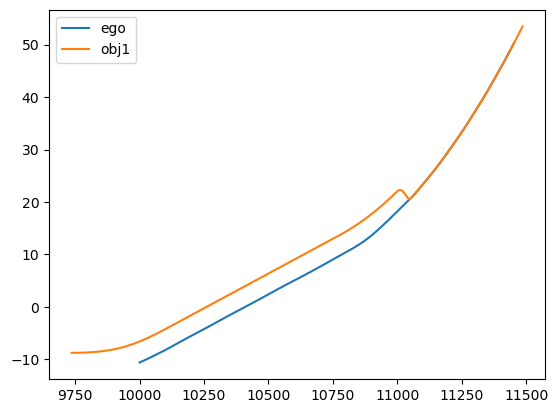

In [4]:
# with this plot it can be seen visually when obj1 went to the same path as ego
plt.plot(data['x_ego'], data['y_ego'], label = 'ego')
plt.plot(data['x_1'], data['y_1'], label = 'obj1')
plt.legend()
plt.show()



In [5]:
#function for checking if obj1 is in the same driving path
def is_in_sight(car_x, car_y, car_w, obj_x, obj_y, obj_w, obj_length, obj_width):
    half_diagonal = np.sqrt(obj_width * obj_width + obj_length * obj_length) / 2
    angle = np.arctan(obj_width / obj_length) + obj_w
    corners = []
    a, b = obj_length, obj_width
    for _ in range(4):
        corners.append(
            [obj_x + np.cos(angle) * half_diagonal, obj_y + np.sin(angle) * half_diagonal]
        )
        angle += 2 * np.arctan(a / b)
        a, b = b, a

    b = car_y - np.tan(car_w) * car_x
    results = [y - x * np.tan(car_w) - b for x, y in corners]
    return not (all([res > 0 for res in results]) or all([res < 0 for res in results]))


In [6]:
#creating a copy of original data frame but only for data when obj1 and ego are on the same path
data["in_sight_1"] = data.apply(
    lambda row: is_in_sight(
        row["x_ego"], row["y_ego"], row["w_ego"],
        row["x_1"], row["y_1"], row["w_1"],
        row["length_1"], row["width_1"]
    ),
    axis=1
)
same_path = data.loc[data.in_sight_1 == True]
same_path.reset_index(drop = True, inplace = True)
same_path

,Cycle,width_ego,length_ego,x_ego,y_ego,vx_ego,vy_ego,ax_ego,ay_ego,w_ego,...,width_2,length_2,x_2,y_2,vx_2,vy_2,ax_2,ay_2,w_2,in_sight_1
0,5117,1.899,5.289,11003.07928,18.395908,25.923169,1.243746,-3.308058,0.159702,0.047941,...,2.065268,7,11075.45809,22.024084,27.733862,1.561362,0.0,0.0,0.056239,True
1,5118,1.899,5.289,11003.33837,18.408345,25.889984,1.242029,-3.343989,0.161384,0.047937,...,2.065268,7,11075.73543,22.039697,27.733862,1.561362,0.0,0.0,0.056239,True
2,5119,1.899,5.289,11003.59712,18.420766,25.856264,1.240286,-3.388981,0.163500,0.047932,...,2.065268,7,11076.01277,22.055311,27.733862,1.561362,0.0,0.0,0.056239,True
3,5120,1.899,5.289,11003.85553,18.433169,25.822269,1.238530,-3.424978,0.165185,0.047927,...,2.065268,7,11076.29011,22.070925,27.733862,1.561362,0.0,0.0,0.056239,True
4,5121,1.899,5.289,11004.11360,18.445555,25.787738,1.236747,-3.470096,0.167305,0.047922,...,2.065268,7,11076.56745,22.086538,27.733862,1.561362,0.0,0.0,0.056239,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,8980,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True
3864,8981,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True
3865,8982,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True
3866,8983,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,2.065268,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True


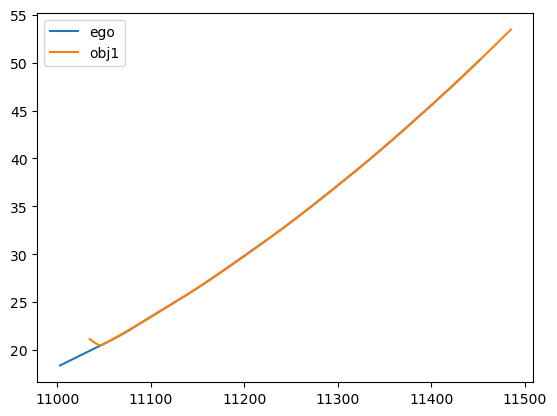

In [7]:
# plotting the path of both vehicles to see visually that they are on the same path
plt.plot(same_path['x_ego'], same_path['y_ego'], label = 'ego')
plt.plot(same_path['x_1'], same_path['y_1'], label = 'obj1')
plt.legend()
plt.show()



In [8]:
#calculating distances between ego and obj1 for every cycle when they have same path
dist_ego_obj1 = []
for i in range(same_path.shape[0]):
    ego_xy = [same_path['x_ego'][i], same_path['y_ego'][i]]
    obj1_xy = [same_path['x_1'][i], same_path['y_1'][i]]
    dist_ego_obj1.append(math.dist(ego_xy, obj1_xy))
same_path['dist_ego_obj1'] = dist_ego_obj1
same_path

C:\Users\koles\AppData\Local\Temp\ipykernel_32836\2337651218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_path['dist_ego_obj1'] = dist_ego_obj1


,Cycle,width_ego,length_ego,x_ego,y_ego,vx_ego,vy_ego,ax_ego,ay_ego,w_ego,...,length_2,x_2,y_2,vx_2,vy_2,ax_2,ay_2,w_2,in_sight_1,dist_ego_obj1
0,5117,1.899,5.289,11003.07928,18.395908,25.923169,1.243746,-3.308058,0.159702,0.047941,...,7,11075.45809,22.024084,27.733862,1.561362,0.0,0.0,0.056239,True,31.895559
1,5118,1.899,5.289,11003.33837,18.408345,25.889984,1.242029,-3.343989,0.161384,0.047937,...,7,11075.73543,22.039697,27.733862,1.561362,0.0,0.0,0.056239,True,31.781637
2,5119,1.899,5.289,11003.59712,18.420766,25.856264,1.240286,-3.388981,0.163500,0.047932,...,7,11076.01277,22.055311,27.733862,1.561362,0.0,0.0,0.056239,True,31.667566
3,5120,1.899,5.289,11003.85553,18.433169,25.822269,1.238530,-3.424978,0.165185,0.047927,...,7,11076.29011,22.070925,27.733862,1.561362,0.0,0.0,0.056239,True,31.553357
4,5121,1.899,5.289,11004.11360,18.445555,25.787738,1.236747,-3.470096,0.167305,0.047922,...,7,11076.56745,22.086538,27.733862,1.561362,0.0,0.0,0.056239,True,31.438998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,8980,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360
3864,8981,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360
3865,8982,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360
3866,8983,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,7,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360


In [9]:
# adding new column to see how much time in ms passed
same_path['time'] = ((same_path['Cycle']*10))
same_path

C:\Users\koles\AppData\Local\Temp\ipykernel_32836\3604096815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_path['time'] = ((same_path['Cycle']*10))


,Cycle,width_ego,length_ego,x_ego,y_ego,vx_ego,vy_ego,ax_ego,ay_ego,w_ego,...,x_2,y_2,vx_2,vy_2,ax_2,ay_2,w_2,in_sight_1,dist_ego_obj1,time
0,5117,1.899,5.289,11003.07928,18.395908,25.923169,1.243746,-3.308058,0.159702,0.047941,...,11075.45809,22.024084,27.733862,1.561362,0.0,0.0,0.056239,True,31.895559,51170
1,5118,1.899,5.289,11003.33837,18.408345,25.889984,1.242029,-3.343989,0.161384,0.047937,...,11075.73543,22.039697,27.733862,1.561362,0.0,0.0,0.056239,True,31.781637,51180
2,5119,1.899,5.289,11003.59712,18.420766,25.856264,1.240286,-3.388981,0.163500,0.047932,...,11076.01277,22.055311,27.733862,1.561362,0.0,0.0,0.056239,True,31.667566,51190
3,5120,1.899,5.289,11003.85553,18.433169,25.822269,1.238530,-3.424978,0.165185,0.047927,...,11076.29011,22.070925,27.733862,1.561362,0.0,0.0,0.056239,True,31.553357,51200
4,5121,1.899,5.289,11004.11360,18.445555,25.787738,1.236747,-3.470096,0.167305,0.047922,...,11076.56745,22.086538,27.733862,1.561362,0.0,0.0,0.056239,True,31.438998,51210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,8980,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89800
3864,8981,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89810
3865,8982,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89820
3866,8983,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,12141.81118,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89830


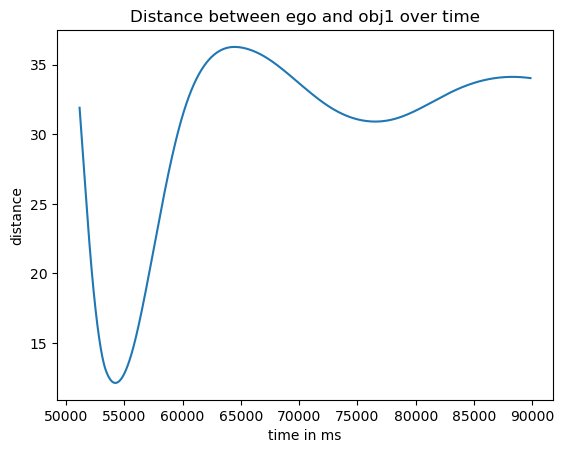

In [10]:
# plot to see how distance between vehicles changed over time
plt.plot(same_path['time'], same_path['dist_ego_obj1'])

plt.ylabel('distance')
plt.xlabel('time in ms')

plt.title('Distance between ego and obj1 over time')

# function to show the plot
plt.show()

In [11]:
#calculating time to collusion for every cycle
ttc_ego_obj1 = []
speed_ego = []
speed_obj1 = []
for i in range(same_path.shape[0]):
    v_ego = math.sqrt((same_path['vx_ego'][i])**2 + (same_path['vy_ego'][i])**2)
    v_obj1 = math.sqrt((same_path['vx_1'][i])**2 + (same_path['vy_1'][i])**2)
    ttc = (same_path['dist_ego_obj1']/(v_ego + v_obj1))
    ttc_ego_obj1.append(ttc)
    speed_ego.append(v_ego)
    speed_obj1.append(v_obj1)
same_path['ttc_ego_obj1'] = ttc_ego_obj1
same_path

C:\Users\koles\AppData\Local\Temp\ipykernel_32836\3604507624.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_path['ttc_ego_obj1'] = ttc_ego_obj1


,Cycle,width_ego,length_ego,x_ego,y_ego,vx_ego,vy_ego,ax_ego,ay_ego,w_ego,...,y_2,vx_2,vy_2,ax_2,ay_2,w_2,in_sight_1,dist_ego_obj1,time,ttc_ego_obj1
0,5117,1.899,5.289,11003.07928,18.395908,25.923169,1.243746,-3.308058,0.159702,0.047941,...,22.024084,27.733862,1.561362,0.0,0.0,0.056239,True,31.895559,51170,0 0.783296 1 0.780499 2 0.77...
1,5118,1.899,5.289,11003.33837,18.408345,25.889984,1.242029,-3.343989,0.161384,0.047937,...,22.039697,27.733862,1.561362,0.0,0.0,0.056239,True,31.781637,51180,0 0.784901 1 0.782097 2 0.77...
2,5119,1.899,5.289,11003.59712,18.420766,25.856264,1.240286,-3.388981,0.163500,0.047932,...,22.055311,27.733862,1.561362,0.0,0.0,0.056239,True,31.667566,51190,0 0.786522 1 0.783713 2 0.78...
3,5120,1.899,5.289,11003.85553,18.433169,25.822269,1.238530,-3.424978,0.165185,0.047927,...,22.070925,27.733862,1.561362,0.0,0.0,0.056239,True,31.553357,51200,0 0.788155 1 0.785340 2 0.78...
4,5121,1.899,5.289,11004.11360,18.445555,25.787738,1.236747,-3.470096,0.167305,0.047922,...,22.086538,27.733862,1.561362,0.0,0.0,0.056239,True,31.438998,51210,0 0.789806 1 0.786985 2 0.78...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,8980,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89800,0 1.360051 1 1.355193 2 1.35...
3864,8981,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89810,0 1.360051 1 1.355193 2 1.35...
3865,8982,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89820,0 1.360051 1 1.355193 2 1.35...
3866,8983,1.899,5.289,11451.20229,50.231989,11.732952,1.107197,0.079161,-0.007768,0.094088,...,135.743489,27.519535,3.778909,0.0,0.0,0.136464,True,34.026360,89830,0 1.360051 1 1.355193 2 1.35...


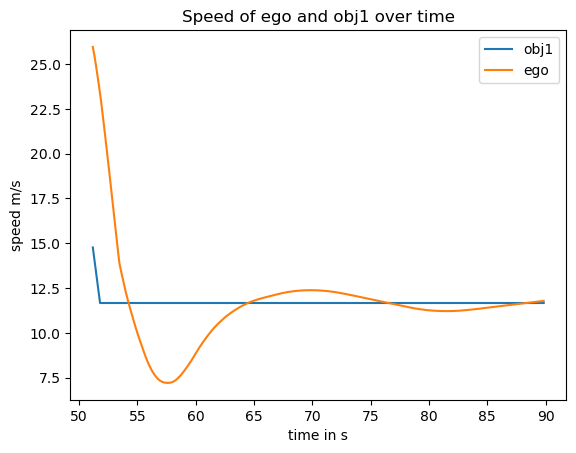

In [13]:
# plot to see how speed of both vehicles changed over time
plt.plot(same_path['time']*0.001, speed_obj1, label = 'obj1')
plt.plot(same_path['time']*0.001, speed_ego, label = 'ego')

plt.ylabel('speed m/s')
plt.xlabel('time in s')
plt.legend()
plt.title('Speed of ego and obj1 over time')

plt.show()